<strong>A2: Regression Model Development (Individual assignment)</strong><br><br>
DAT-5390 | Computational Data Analytics with Python<br><br>
<strong>Htet Aung Kyaw</strong> - MBAN student<br>
Hult International Business School<br><br>
Date: 19 Feb 2023

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>Part I: Preparation and Exploration</h4>
<br><h5>a) Imports packages</h5>
<ul>
<li>Import the Pandas data frame then give alias as pd.</li>
<li>Import pyplot from Matplotlib then give alias as plt.</li>
<li>Import Seaborn and give alias as sns.</li>
<li>Import api from statsmodels's formula package then give alias as smf.</li>
<li>Import numpy then give alisa as np.</li>
<li>Import scikit learn (sklearn) linear model.</li>
<li>Import learn train_test_split from scikit learn's model selection.</li>
<li>Import tree from scikit learn.</li>
<li>Import Gradient Boosting Regressor from scikit learn.</li>
</ul>
<h5>b) Initial Setup</h5>
<ul>
<li>Set output display row to a maximum of 500.</li>
<li>Set output display column to a maximum of 500 columns.</li>
<li>Set output display width to a maximum of 1000.</li>
</ul>
<h5>c) Load Dataset</h5>
<ol>
<li>Set the dataset file path to a variable called "file".</li>
<li>Use pandas to read excel file from the path.</li>
<li>Check the first 5 line of dataset if the file is loaded properly.</li>
</ol>

In [1]:
############################### IMPORT MODULES #################################

# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
import numpy as np                    # mathematical essentials

# importing machine learning models
from sklearn.ensemble import GradientBoostingRegressor # gbm
import sklearn.linear_model # linear modeling in scikit-learn

# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree    

############################### OUTPUT SETTING #################################

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

################################## FILE LOAD ###################################

# load file
file = "./__datasets/Apprentice_Chef_Dataset_2023.xlsx"

# use pandas dataframe to read excel file
chef = pd.read_excel(io= file)

# check if the file is imported and working properly before moving to the next section
chef.head(n = 5)


,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


<h5>d) Create New Columns</h5>
<ul>
<li>Create a new column called "ORGANIZATION" from "EMAIL" column. To identify the personal, professional, or junk email.<br><br>
<ul>
<li>Use iterrows to loop through the dataframe, then split the value of "ORGANIZATION" in each row with .split()<br>
 function and stored the capitalized string into "ORGANIZATION" with respective index.</li><br>
</ul>
</li>
<li>Create a new column called "MEAL_ORDERED_MULTIPLY_LARGEST_SIZE" by  multiplying "TOTAL_MEALS_ORDERED" and <br>
"LARGEST_ORDER_SIZE". To assess the highest spending power of each of the customer.</li><br>
<li>Create a new column called "PER_MONTH_CUSTOMER" by dividing "TOTAL_MEALS_ORDERED" column with 12. To see how <br>
often a customer visit the shop per month.</li><br>
<li>Create a new column called "TOTAL_LOGINS" by combining "PC_LOGINS" and "MOBILE_LOGINS" columns. To see how <br>
active a customer is given both of the login channel.</li>
</ul>

In [2]:
######################### CREATE NEW COLUMNS ############################

# create a new column named "ORGANIZATION" from email
chef["ORGANIZATION"] = chef["EMAIL"].copy()

# iterating over each email to seperate name and organization name then capitalize
# using iterrows to loop through and split then store in ORGANIZATION column
for index, value in chef.iterrows():

    chef.loc[index, 'ORGANIZATION'] = chef.loc[index, 'ORGANIZATION'].split("@")[-1].split(".")[0].capitalize()

# create a new column named "MEAL_ORDERED_MULTIPLY_LARGEST_SIZE",  
# which is multiply by "TOTAL_MEALS_ORDERED" column and "LARGEST_ORDER_SIZE" column
chef["MEAL_ORDERED_MULTIPLY_LARGEST_SIZE"] = chef["TOTAL_MEALS_ORDERED"] * chef["LARGEST_ORDER_SIZE"]

# create a new column named "PER_MONTH_CUSTOMER", which is divided by 12,
# as the introduction mentioned that a customer at least visit 11 times in a year
# or one a quarter with 15 times in a year.
chef["PER_MONTH_CUSTOMER"] = round(chef["TOTAL_MEALS_ORDERED"]/12)

# create a new column named "TOTAL_LOGINS", which is the sum of "PC_LOGINS" and "MOBILE_LOGINS",
# to measure the active customer
chef["TOTAL_LOGINS"] = chef["PC_LOGINS"] + chef["MOBILE_LOGINS"]

<h5>e) Clean Data</h5>
<ul>
<li>Create a new column called "LATE_DELIVERIES" from "LATE_DELIVERIES "(with a space at the end) column.<br>
During the OLS model fitting, the original "LATE_DELIVERIES " column causes error due to a space at the end.<br>
In order to fix this, I created a new column giving the same name (without a space at the end).</li><br>
<li>Then drop the original "LATE_DELIVERIES " column with space.</li><br>
<li>Check if the data frame contain any null values. There is 46 null values in the data frame.</li><br>
<li>Check which column that those null values are located. They are located in the "FAMILY_NAME" column.<br>
So it is presumed that some of the customer just leave their first name only. So the "FAMILY_NAME" null<br>
values are treated as string and filled with "UNKNOWN".</li><br>
<li>Check the total missing value again. No more null value in the data frame.</li>
</ul>


In [3]:
############################### DATA CLEANING ##################################

# there is a space following "LATE_DELIVERIES", causing the OLS model error.
# so use use a new column to reply the existing ones

# create new "LATE_DELIVERIES" without space at surfix.
chef["LATE_DELIVERIES"] = chef["LATE_DELIVERIES "]

# delete original "LATE_DELIVERIES " column with space at surfix
chef.drop(columns="LATE_DELIVERIES ", axis= 1)

# check if there is any null values
chef.isna().sum(axis= 0).sum()

# Since the null are in the family name column, consider as customer
# just use their first name during registration, so name null value as "UNKNOWN"
chef.isnull().sum()
chef = chef.fillna("UNKNOWN")

# check missing value
chef.isna().sum(axis= 0).sum()


0

<h5>f) Define Data Type</h5>
<ul>
<li>Define a new variable called "continuous" to store continuous data type list. To make the subsetting of<br>
data frame easier. The continuous data type are decide based on the scatter plots and box plots patterns.</li><br>
<li>Define a new variable called "interval" to store interval data type list.</li><br>
<li>Define a new variable called "categorical" to store the categorical data type list.</li><br>
<li>To identify whether the domain name represent the personal, professional, or junk email. The list is<br>
 provided by the introduction document.</li><br>
<ul>
<li>Define a new variable called "personal_category" to store the list of personal emails.</li><br>
<li>Define a new variable called "junk_category" to store the list of junk emails.</li><br>
<li>"professional_category" is not necessary, I could use the "is not" condition to rule out the other two<br>
variables from the dataset.</li>
</ul>
</ul>


In [4]:
############################# DEFINE DATA TYPE #################################
# define continuous data list for easy subsetting
continuous = ["REVENUE", 
              "AVG_TIME_PER_SITE_VISIT", 
              "AVG_PREP_VID_TIME", 
              "TOTAL_MEALS_ORDERED", 
              "TOTAL_PHOTOS_VIEWED" , 
              "MEAL_ORDERED_MULTIPLY_LARGEST_SIZE"]

# define interval data list for easy subsetting
interval = ["CONTACTS_W_CUSTOMER_SERVICE", 
            "PRODUCT_CATEGORIES_VIEWED",
            "CANCELLATIONS_AFTER_NOON", 
            "PC_LOGINS", 
            "MOBILE_LOGINS", 
            "WEEKLY_PLAN", 
            "LATE_DELIVERIES",
            "AVG_MEAN_RATING", 
            "LARGEST_ORDER_SIZE",
            "PER_MONTH_CUSTOMER",
            "UNIQUE_MEALS_PURCH",
            "TOTAL_LOGINS"]

# define categorical data list for easy subsetting
categorical = ["NAME", "EMAIL", "FIRST_NAME", "FAMILY_NAME", "ORGANIZATION"]

# define personal email domain, list from assignment introduction
personal_category = ["Gmail", "Yahoo", "Protonmail"]
# define junk email domain, list from assignment introduction
junk_category = ["Me", "Aol", "Hotmail", "Live", "Msn", "Passport"]

<h4>Part II: Base Modeling</h4>
<br><h5>a) Analyze dataset correlate to <em>REVENUE</em>.</h5>
<ol>
<li>Define a new varialbe called "log_corr" to subset the chef dataframe.</li><br>
<li>Use <strong>.corr()</strong> to set the correlation between <em>REVENUE</em> and all other non-categorical data.</li><br>
<li>The method argument is set to 'pearson' with a decimal of 2 points.</li><br>
<li>Then use a dynamic string to print out the result.</li><br>
<li>Reading the result:<br><br>
<ul>
<li>The result indicates that a strong correlation with AVG_TIME_PER_SITE_VISIT, TOTAL_MEALS_ORDERED, TOTAL_PHOTOS_VIEWED,<br>
MEAL_ORDERED_MULTIPLY_LARGEST_SIZE, AVG_MEAN_RATING, LARGEST_ORDER_SIZE, and PER_MONTH_CUSTOMER.</li><br>
<li>A low correlation on AVG_PREP_VID_TIME, CONTACTS_W_CUSTOMER_SERVICE, PRODUCT_CATEGORIES_VIEWED, CANCELLATIONS_AFTER_NOON<br>
PC_LOGINS, MOBILE_LOGINS, WEEKLY_PLAN, LATE_DELIVERIES, and UNIQUE_MEALS_PURCH.</li><br>
<li>All the strong and weak correlations will treat in the following section.</li></ul>
</ol>

In [5]:
############################ CHECK CORREALTION WITH REVENUE #################################
# check the correlation with revenue and all other chosen variables
log_corr = chef.loc[ : , continuous + interval  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

# printing value counts and correlations log revenue
print(f"""
---------------------
Variables Correlation
---------------------
{log_corr['REVENUE']}
""")


---------------------
Variables Correlation
---------------------
REVENUE                               1.00
AVG_TIME_PER_SITE_VISIT               0.64
AVG_PREP_VID_TIME                     0.14
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.46
MEAL_ORDERED_MULTIPLY_LARGEST_SIZE    0.64
CONTACTS_W_CUSTOMER_SERVICE           0.17
PRODUCT_CATEGORIES_VIEWED             0.03
CANCELLATIONS_AFTER_NOON              0.00
PC_LOGINS                             0.02
MOBILE_LOGINS                         0.07
WEEKLY_PLAN                           0.01
LATE_DELIVERIES                      -0.02
AVG_MEAN_RATING                      -0.55
LARGEST_ORDER_SIZE                    0.44
PER_MONTH_CUSTOMER                    0.60
UNIQUE_MEALS_PURCH                    0.10
TOTAL_LOGINS                          0.06
Name: REVENUE, dtype: float64



<br><h5>b) Develop scatter plots and box plots between <em>REVENUE</em> and the variable with the strongest correlation to <em>REVENUE</em>.</h5>
<ul>
<li>Firgure 1. Scatter plots for continuous data type</li><br>
<ul>
<li>Plot 1. AVG_TIME_PER_SITE_VISIT to REVENUE.</li>
<li>Plot 2. AVG_PREP_VID_TIME to REVENUE (consists a dense striaghtline pattern along zero on x axis).</li>
<li>Plot 3. TOTAL_MEALS_ORDERED to REVENUE (consists a dense (close to) zero values on x axis under revenue 2000).</li>
<li>Plot 4. TOTAL_PHOTOS_VIEWED to REVENUE (consists a dense striaghtline pattern along zero on x axis).</li>
<li>Plot 5. MEAL_ORDERED_MULTIPLY_LARGEST_SIZE to REVENUE (consists a dense (close to) zero values on x axis under revenue 2000).</li>
</ul><br>
<li>Figure 2. Box plots for interval data type</li><br>
<ul>
<li>Plot 1. CONTACTS_W_CUSTOMER_SERVICE to REVENUE (the data is almost evenly distributed from 0 - 9).</li>
<li>Plot 2. PRODUCT_CATEGORIES_VIEWED to REVENUE.</li>
<li>Plot 3. CANCELLATIONS_AFTER_NOON to REVENUE (the data is almost evenly distributed from 0 - 8).</li>
<li>Plot 4. PC_LOGINS to REVENUE.</li>
<li>Plot 5. MOBILE_LOGINS to REVENUE.</li>
<li>Plot 6. TOTAL_LOGINS to REVENUE.</li>
</ul><br>
<li>Figure 3. Box plots for interval data type</li><br>
<ul>
<li>Plot 1. LATE_DELIVERIES to REVENUE (the data is almost evenly distributed from 0 - 16).</li>
<li>Plot 2. AVG_MEAN_RATING to REVENUE (the data is right skew, best method is log transformation).</li>
<li>Plot 3. LARGEST_ORDER_SIZE to REVENUE (the data is left skew, use log transformation to treat skewness).</li>
<li>Plot 4. PER_MONTH_CUSTOMER to REVENUE (the plot look close to linear from 1.0 - 22.0).</li>
<li>Plot 5. UNIQUE_MEALS_PURCH to REVENUE (the plot looks uniform from 0 - 10).</li>
<li>Plot 6. WEEKLY_PLAN to REVENUE</li>
</ul><br>
<li>During the plot display, there were x tickers are too pupulated and distrupting the readibility. <br>
I used the round function and rotation argument to solve the issue.</li>
</ul>

C:\Users\hboyz\AppData\Local\Temp\ipykernel_31452\1172486806.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_31452\1172486806.py:74: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_31452\1172486806.py:153: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


Text(0, 0.5, 'Revenue')

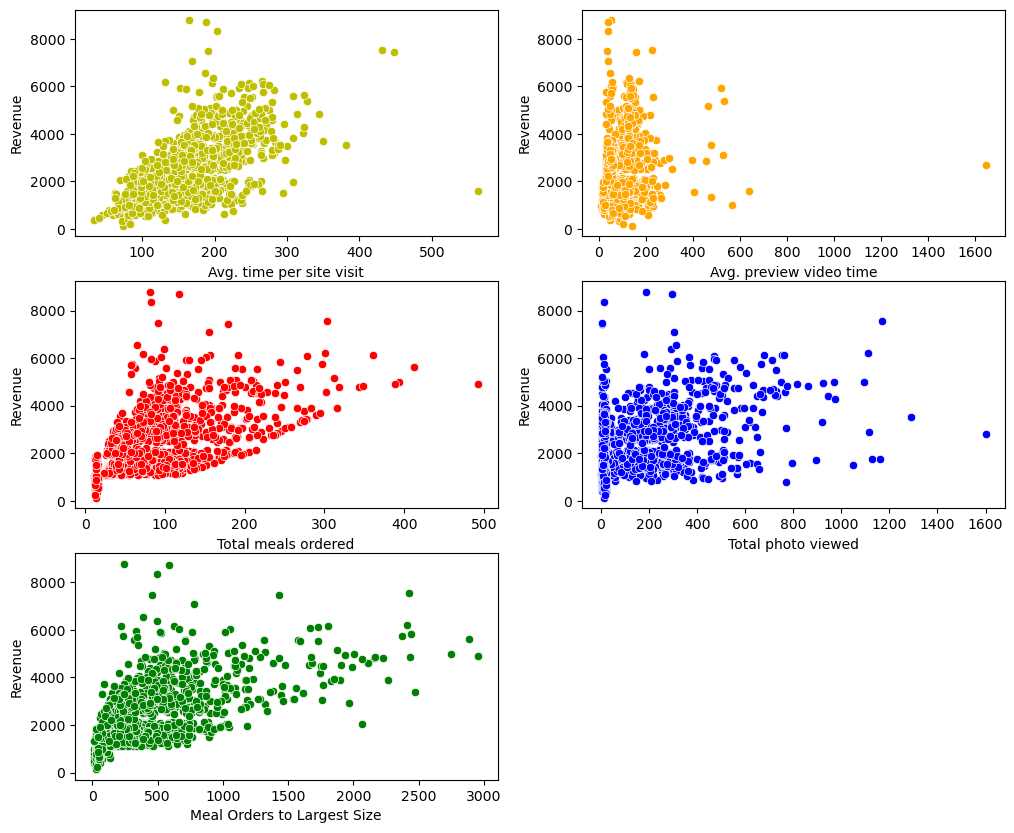

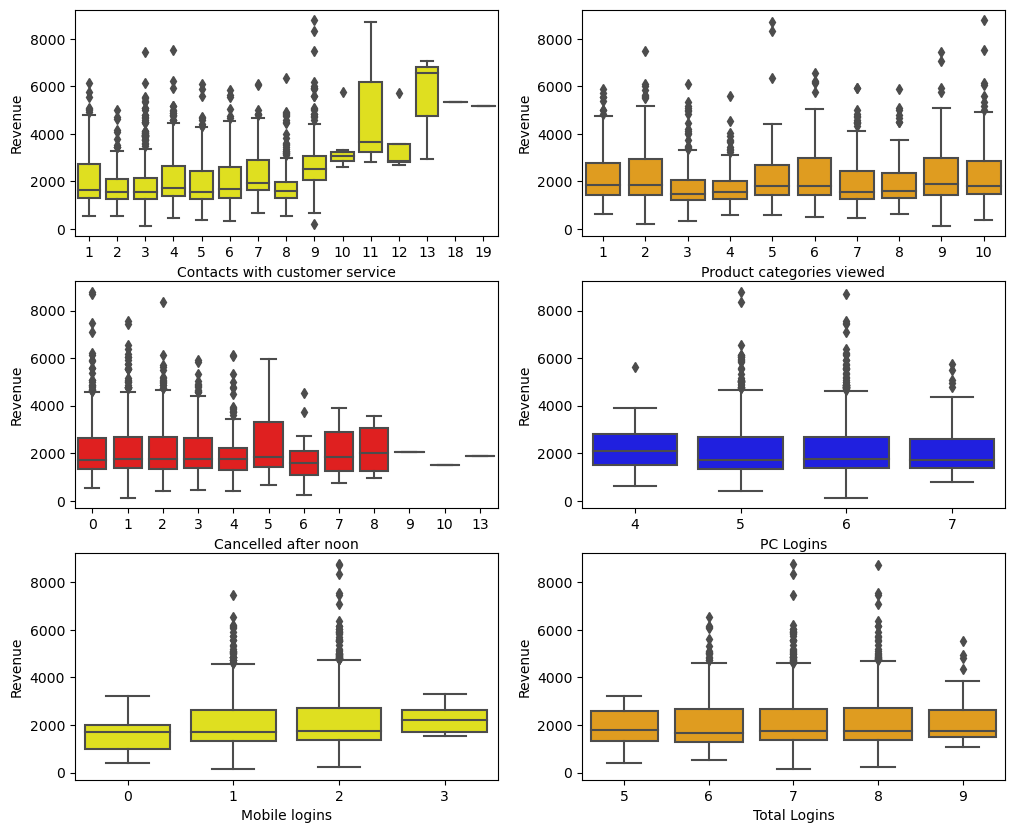

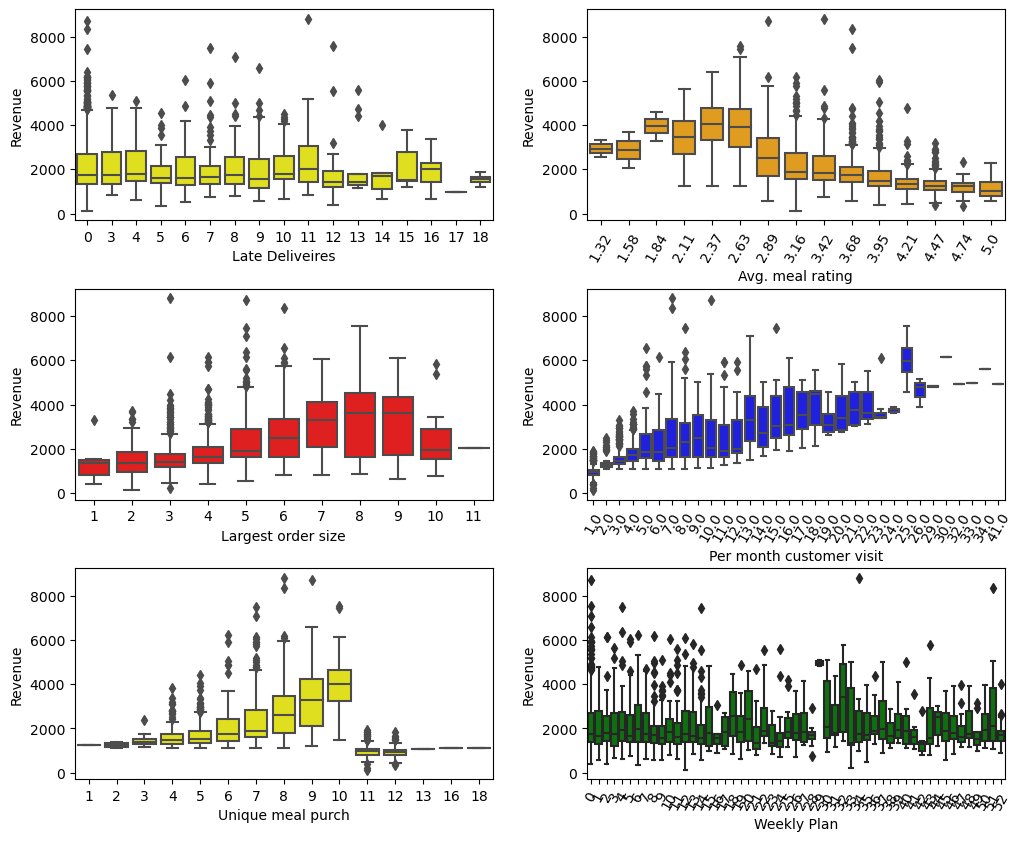

In [6]:
################# USE PLOTS TO ANALYZE CORRELATIONS #######################
########################
# Visual EDA (Scatterplots and boxplots)
########################

# setting figure size for all continuous data
fig, ax = plt.subplots(figsize = (12, 10))

# developing a scatterplot for Avg. time per site visit
# and revenue with color dark yellow
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'y')
# adding labels but not adding title
plt.xlabel(xlabel = 'Avg. time per site visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot for Avg. prep. video time
# and revenue with color orange
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'orange')
# adding labels but not adding title
plt.xlabel(xlabel = 'Avg. preview video time')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot for total meals ordered
# and revenue with color red
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'red')
# adding labels but not adding title
plt.xlabel(xlabel = 'Total meals ordered')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot for total photos viewed
# and revenue with color blue
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'blue')
# adding labels but not adding title
plt.xlabel(xlabel = 'Total photo viewed')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot for meal ordered multiply x largest size
# and revenue with color green
plt.subplot(3, 2, 5)
sns.scatterplot(x = chef['MEAL_ORDERED_MULTIPLY_LARGEST_SIZE'],
                y = chef['REVENUE'],
                color = 'green')
# adding labels but not adding title
plt.xlabel(xlabel = 'Meal Orders to Largest Size')
plt.ylabel(ylabel = 'Revenue')

########################

# setting figure size for interval datas
fig, ax = plt.subplots(figsize = (12, 10))

# developing a boxplot for contacts with customer service
# and revenue with color yellow
plt.subplot(3, 2, 1)
sns.boxplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'yellow')
# adding labels but not adding title
plt.xlabel(xlabel = 'Contacts with customer service')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for product categories viewed
# and revenue with color orange
plt.subplot(3, 2, 2)
sns.boxplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'orange')
# adding labels but not adding title
plt.xlabel(xlabel = 'Product categories viewed')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for cancelled after noon
# and revenue with color red
plt.subplot(3, 2, 3)
sns.boxplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'red')
# adding labels but not adding title
plt.xlabel(xlabel = 'Cancelled after noon')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for PC logins
# and revenue with color blue
plt.subplot(3, 2, 4)
sns.boxplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'blue')
# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for mobile logins
# and revenue with color yellow
plt.subplot(3, 2, 5)
sns.boxplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'yellow')
# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile logins')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for weekly plan
# and revenue with color orange
plt.subplot(3, 2, 6)
sns.boxplot(x = chef['TOTAL_LOGINS'],
                y = chef['REVENUE'],
                color = 'orange')
# adding labels but not adding title
plt.xlabel(xlabel = 'Total Logins')
plt.ylabel(ylabel = 'Revenue')

########################

# setting figure size for interval datas
# adjust the padding of height and width
# to prevent overlapping of word when rotate
# the xtickers
fig, ax = plt.subplots(figsize = (12, 10))
fig.subplots_adjust(hspace=0.325, wspace=0.225)

# developing a boxplot for late deliveries
# and revenue with color yellow
plt.subplot(3, 2, 1)
sns.boxplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'yellow')
# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveires')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for Avg. meal rating
# and revenue with color orange
# round to two decimals for xtickers
plt.subplot(3, 2, 2)
sns.boxplot(x = round(chef['AVG_MEAN_RATING'],2),
                y = chef['REVENUE'],
                color = 'orange')
# adding labels but not adding title
# rotate populated xtickers
plt.xticks(rotation=60)
plt.xlabel(xlabel = 'Avg. meal rating')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for largest order size
# and revenue with color red
plt.subplot(3, 2, 3)
sns.boxplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'red')
# adding labels but not adding title
plt.xlabel(xlabel = 'Largest order size')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for customer visit per month
# and revenue with color blue
# round to two decimals for xtickers
plt.subplot(3, 2, 4)
sns.boxplot(x = round(chef['PER_MONTH_CUSTOMER'],2),
                y = chef['REVENUE'],
                color = 'blue')
# adding labels but not adding title
# rotate populated xtickers
plt.xticks(rotation = 60)
plt.xlabel(xlabel = 'Per month customer visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for unique meals punch
# and revenue with color yellow
plt.subplot(3, 2, 5)
sns.boxplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'yellow')
# adding labels but not adding title
plt.xlabel(xlabel = 'Unique meal purch')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot for total logins
# and revenue with color green
plt.subplot(3, 2, 6)
sns.boxplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'green')
# adding labels but not adding title
# rotate populated xtickers
plt.xticks(rotation=60)
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')

<br><h5>c) logarithmic Transformation for Skew Variables</h5>
<ol>
<li>Use .skew() function to check the continuous data before the log transformation. Based on the result they are all skewed.</li><br>
<li>Use a for loop to loop through all continuous data and check their skewness. If the result is skew, use a conditional<br>
statement to execute the np.log() function for a logarithmic transformation to that specific variable.</li><br>
<li>Then the loop will update the newly added continous data list as well.</li><br>
<li>Use .skew() to print out the skewness of all continuous variables again. All the skewed variables are transformed as log and<br>
created new columns with respective names with prefix "log_".</li><br>
<li>After fitting the OLS model, discovered that log transformation of "UNIQUE_MEALS_PURCH" and "PER_MONTH_CUSTOMER" could improve<br>
the R square value. So added this two interval data in the log transformation.</li>
</ol>

In [7]:
############################## TREAT SKEWNESS ##################################
# check skewness of continuous data before logarithmic transformation
print(">>>>>>>> BEFORE LOG TRANSFORM <<<<<<<<")
print(chef[continuous].skew())
print("\n\n")

# Log transformation all continuous data

# treat any continuous values which is above 1 or under -1
# also append the new log varialbes into continuous data list
for item in chef[continuous]:
    if chef[continuous][item].skew() > 1 or chef[continuous][item].skew() < -1:
        chef[f'log_{item}'] = np.log(chef[continuous][item])
        continuous.append(f'log_{item}')

# check the skewness again to check if the skewness are improved
print(">>>>>>>> AFTER LOG TRANSFORM <<<<<<<<")
print(chef[continuous].skew())

# after fitting OLS model, I discover that this log transformation of this two variables 
# could improve the final score. So it is added here for their log transformation.
chef["log_UNIQUE_MEALS_PURCH"] = np.log(chef["UNIQUE_MEALS_PURCH"])
chef["log_PER_MONTH_CUSTOMER"] = np.log(chef["PER_MONTH_CUSTOMER"])

>>>>>>>> BEFORE LOG TRANSFORM <<<<<<<<
REVENUE                               1.626573
AVG_TIME_PER_SITE_VISIT               1.200283
AVG_PREP_VID_TIME                     9.639388
TOTAL_MEALS_ORDERED                   2.006653
TOTAL_PHOTOS_VIEWED                   2.604685
MEAL_ORDERED_MULTIPLY_LARGEST_SIZE    2.767944
dtype: float64



>>>>>>>> AFTER LOG TRANSFORM <<<<<<<<
REVENUE                                   1.626573
AVG_TIME_PER_SITE_VISIT                   1.200283
AVG_PREP_VID_TIME                         9.639388
TOTAL_MEALS_ORDERED                       2.006653
TOTAL_PHOTOS_VIEWED                       2.604685
MEAL_ORDERED_MULTIPLY_LARGEST_SIZE        2.767944
log_REVENUE                               0.184090
log_AVG_TIME_PER_SITE_VISIT              -0.063739
log_AVG_PREP_VID_TIME                    -0.490844
log_TOTAL_MEALS_ORDERED                  -0.283446
log_TOTAL_PHOTOS_VIEWED                   0.400043
log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE   -0.308195
dtype: floa

<br><h5>d) Building a base model</h5>
<ul>
<li>Using a statsmodel to provide a basic framework for developing a predictive model.</li>
<li>Create a new variable called "lm_practice", then fit the all the continuous and interval data into the model.</li>
<li>The R square from the result is 0.63 using the original features.</li>
</ul>

In [8]:
############################ BUILD BASE MODEL #################################
# INSTANTIATING an OLS model type with initial dataset
lm_practice = smf.ols(formula = f"""  REVENUE 
                                    ~ AVG_TIME_PER_SITE_VISIT
                                    + AVG_PREP_VID_TIME
                                    + TOTAL_MEALS_ORDERED
                                    + TOTAL_PHOTOS_VIEWED
                                    + MEAL_ORDERED_MULTIPLY_LARGEST_SIZE
                                    + CONTACTS_W_CUSTOMER_SERVICE 
                                    + PRODUCT_CATEGORIES_VIEWED
                                    + CANCELLATIONS_AFTER_NOON
                                    + PC_LOGINS 
                                    + MOBILE_LOGINS 
                                    + WEEKLY_PLAN
                                    + LATE_DELIVERIES
                                    + AVG_MEAN_RATING
                                    + LARGEST_ORDER_SIZE 
                                    + PER_MONTH_CUSTOMER                                    
                                    + UNIQUE_MEALS_PURCH
                                    + TOTAL_LOGINS""",
                                    data = chef)

# telling Python to FIT the data to the blueprint
results = lm_practice.fit()

# printing a summary of the results
print(results.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:29:03   Log-Likelihood:                -15488.
No. Observations:                1946   AIC:                         3.101e+04
Df Residuals:                    1929   BIC:                         3.110e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

<br><h5>e) Create New Features</h5>
<ul>
<li>Check percentiles of each columns using .describe() function.</li>
</ul>

In [9]:
# check the distribution of the values quartiles in speicifc column
# to slice each quartile into a new column as binary 
chef.AVG_TIME_PER_SITE_VISIT.describe()
chef.AVG_PREP_VID_TIME.describe()
chef.TOTAL_MEALS_ORDERED.describe()
chef.TOTAL_PHOTOS_VIEWED.describe()
chef.UNIQUE_MEALS_PURCH.describe()
chef.PER_MONTH_CUSTOMER.describe()
chef.CONTACTS_W_CUSTOMER_SERVICE.describe()
chef.AVG_MEAN_RATING.describe()
chef.CANCELLATIONS_AFTER_NOON.describe()
chef.TOTAL_LOGINS.describe()
chef.WEEKLY_PLAN.describe()
chef.LARGEST_ORDER_SIZE.describe()
chef.MOBILE_LOGINS.describe()

count    1946.000000
mean        1.476362
std         0.527600
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: MOBILE_LOGINS, dtype: float64

<ul>
<li>After checking the percentiles of each columns, split each column based on each percentile such as</li><br>
<ul>
<li>75% and above for class 4,</li>
<li>50% to 75% for class 3,</li>
<li>25% to 50% for class 2,</li>
<li>below 25% for class 1.</li>
</ul><br>
<li>Treated for all continuous, interval, and one categorical data.</li><br>
<li>Used iterrow to loop through all the values in the specific index then use if statement to set different classes.</li><br>
<li><strong>Note:</strong> Not all the variables are divided into 4 quartiles, some if the variables such as "LATE_DELIVERIES" are converted<br>
into one column binary as yes or no. While other such as organization are divided into professional, personal, and<br>
junk emails.</li><br>
</ul>

In [10]:
######################### CREATING NEW FEATURES ############################

# the purpose of this section is using conditional statement
# to split into 75%-50%-25% quartiles for most of the columns
# the quartiles values are achieved from above cell with describe.
# Note: not all columns are seperate into quartiles format.
#       some of the columns are treated as yes/no while some are
#       split into 3 section instead of 4.

# create new columns and assign 0 as default,
# use iterrows and if statement to validate the consitions

# create new columns with 0 for AVG_TIME_PER_SITE
chef["AVG_TIME_PER_SITE_VISIT_OUTLIERS_1"] = 0
chef["AVG_TIME_PER_SITE_VISIT_OUTLIERS_2"] = 0
chef["AVG_TIME_PER_SITE_VISIT_OUTLIERS_3"] = 0
chef["AVG_TIME_PER_SITE_VISIT_OUTLIERS_4"] = 0

# create new columns with 0 for AVG_PREP_VID_TIME
chef["AVG_PREP_VID_TIME_OUTLIERS_1"] = 0
chef["AVG_PREP_VID_TIME_OUTLIERS_2"] = 0
chef["AVG_PREP_VID_TIME_OUTLIERS_3"] = 0
chef["AVG_PREP_VID_TIME_OUTLIERS_4"] = 0

# create new columns with 0 for AVG_PREP_VID_TIME
chef["TOTAL_MEALS_ORDERED_OUTLIERS_1"] = 0
chef["TOTAL_MEALS_ORDERED_OUTLIERS_2"] = 0
chef["TOTAL_MEALS_ORDERED_OUTLIERS_3"] = 0
chef["TOTAL_MEALS_ORDERED_OUTLIERS_4"] = 0

# create new columns with 0 for TOTAL_PHOTOS_VIEWED
chef["TOTAL_PHOTOS_VIEWED_OUTLIERS_1"] = 0
chef["TOTAL_PHOTOS_VIEWED_OUTLIERS_2"] = 0
chef["TOTAL_PHOTOS_VIEWED_OUTLIERS_3"] = 0
chef["TOTAL_PHOTOS_VIEWED_OUTLIERS_4"] = 0

# create new columns with 0 for UNIQUE_MEALS_PURCH
chef["UNIQUE_MEALS_PURCH_OUTLIERS_1"] = 0
chef["UNIQUE_MEALS_PURCH_OUTLIERS_2"] = 0
chef["UNIQUE_MEALS_PURCH_OUTLIERS_3"] = 0
chef["UNIQUE_MEALS_PURCH_OUTLIERS_4"] = 0

# create new columns with 0 for PER_MONTH_CUSTOMER
chef["PER_MONTH_CUSTOMER_OUTLIERS_1"] = 0
chef["PER_MONTH_CUSTOMER_OUTLIERS_2"] = 0
chef["PER_MONTH_CUSTOMER_OUTLIERS_3"] = 0
chef["PER_MONTH_CUSTOMER_OUTLIERS_4"] = 0

# create new columns with 0 for CONTACTS_W_CUSTOMER_SERVICE
chef["CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1"] = 0
chef["CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2"] = 0
chef["CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3"] = 0
chef["CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4"] = 0

# create new columns with 0 for AVG_MEAN_RATING
chef["AVG_MEAN_RATING_OUTLIERS_1"] = 0
chef["AVG_MEAN_RATING_OUTLIERS_2"] = 0
chef["AVG_MEAN_RATING_OUTLIERS_3"] = 0
chef["AVG_MEAN_RATING_OUTLIERS_4"] = 0

# create new columns with 0 for CANCELLATIONS_AFTER_NOON
chef["CANCELLATIONS_AFTER_NOON_OUTLIERS_1"] = 0
chef["CANCELLATIONS_AFTER_NOON_OUTLIERS_2"] = 0
chef["CANCELLATIONS_AFTER_NOON_OUTLIERS_3"] = 0

# create new columns with 0 for TOTAL_LOGINS
chef["TOTAL_LOGINS_OUTLIERS_1"] = 0
chef["TOTAL_LOGINS_OUTLIERS_2"] = 0
chef["TOTAL_LOGINS_OUTLIERS_3"] = 0
chef["TOTAL_LOGINS_OUTLIERS_4"] = 0

# create new columns with 0 for WEEKLY_PLAN
chef["WEEKLY_PLAN_OUTLIERS_1"] = 0
chef["WEEKLY_PLAN_OUTLIERS_2"] = 0
chef["WEEKLY_PLAN_OUTLIERS_3"] = 0
chef["WEEKLY_PLAN_OUTLIERS_4"] = 0
chef["LATE_DELIVERIES_YES_NO"] = 0

# create new columns with 0 for LARGEST_ORDER_SIZE
chef["LARGEST_ORDER_SIZE_OUTLIERS_1"] = 0
chef["LARGEST_ORDER_SIZE_OUTLIERS_2"] = 0
chef["LARGEST_ORDER_SIZE_OUTLIERS_3"] = 0
chef["LARGEST_ORDER_SIZE_OUTLIERS_4"] = 0

# create new columns with 0 for EMAIL_PROF (as professional),
# EMAIL_PRRS (as Personal), and EMAIL_JUNK (as junk email)
chef["EMAIL_PROF"] = 0
chef["EMAIL_PERS"] = 0
chef["EMAIL_JUNK"] = 0

# create new columns with 0 for GMAIL_USERS, PRONTON_USERS, and YAHOO_USERS
chef["GMAIL_USERS"] = 0
chef["PROTON_USERS"] = 0
chef["YAHOO_USERS"] = 0

# create new columns with 0 for MOBILE_LOGINS
chef["MOBILE_LOGINS_OUTLIERS_2"] = 0
chef["MOBILE_LOGINS_OUTLIERS_3"] = 0
chef["MOBILE_LOGINS_OUTLIERS_4"] = 0

# use iterrow to loop and chcek the conditions then act accordingly
for index, value in chef.iterrows():

    # if statement for AVG_TIME_PER_SITE_VISIT column
    # 173-145-114 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "AVG_TIME_PER_SITE_VISIT"] > 173:
        chef.loc[index, "AVG_TIME_PER_SITE_VISIT_OUTLIERS_4"] = 1
    elif chef.loc[index, "AVG_TIME_PER_SITE_VISIT"] > 145:
        chef.loc[index, "AVG_TIME_PER_SITE_VISIT_OUTLIERS_3"] = 1
    elif chef.loc[index, "AVG_TIME_PER_SITE_VISIT"] > 114:
        chef.loc[index, "AVG_TIME_PER_SITE_VISIT_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "AVG_TIME_PER_SITE_VISIT_OUTLIERS_1"] = 1

    # if statement for AVG_PREP_VID_TIME column
    # 117-94-72 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "AVG_PREP_VID_TIME"] > 117:
        chef.loc[index, "AVG_PREP_VID_TIME_OUTLIERS_4"] = 1
    elif chef.loc[index, "AVG_PREP_VID_TIME"] > 94:
        chef.loc[index, "AVG_PREP_VID_TIME_OUTLIERS_3"] = 1
    elif chef.loc[index, "AVG_PREP_VID_TIME"] > 72:
        chef.loc[index, "AVG_PREP_VID_TIME_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "AVG_PREP_VID_TIME_OUTLIERS_1"] = 1

    # if statement for TOTAL_MEALS_ORDERED column
    # 95-60-39 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "TOTAL_MEALS_ORDERED"] > 95:
        chef.loc[index, "TOTAL_MEALS_ORDERED_OUTLIERS_4"] = 1
    elif chef.loc[index, "TOTAL_MEALS_ORDERED"] > 60:
        chef.loc[index, "TOTAL_MEALS_ORDERED_OUTLIERS_3"] = 1
    elif chef.loc[index, "TOTAL_MEALS_ORDERED"] > 39:
        chef.loc[index, "TOTAL_MEALS_ORDERED_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "TOTAL_MEALS_ORDERED_OUTLIERS_1"] = 1
    
    # if statement for TOTAL_PHOTOS_VIEWED column
    # 174-17-10 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "TOTAL_PHOTOS_VIEWED"] > 174:
        chef.loc[index, "TOTAL_PHOTOS_VIEWED_OUTLIERS_4"] = 1
    elif chef.loc[index, "TOTAL_PHOTOS_VIEWED"] > 17:
        chef.loc[index, "TOTAL_PHOTOS_VIEWED_OUTLIERS_3"] = 1
    elif chef.loc[index, "TOTAL_PHOTOS_VIEWED"] > 10:
        chef.loc[index, "TOTAL_PHOTOS_VIEWED_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "TOTAL_PHOTOS_VIEWED_OUTLIERS_1"] = 1

    # if statement for TOTAL_PHOTOS_VIEWED column
    # 174-17-10 are the 75%-50%-25% quartiles of the dataset   
    if chef.loc[index, "UNIQUE_MEALS_PURCH"] > 8:
        chef.loc[index, "UNIQUE_MEALS_PURCH_OUTLIERS_4"] = 1
    elif chef.loc[index, "UNIQUE_MEALS_PURCH"] > 7:
        chef.loc[index, "UNIQUE_MEALS_PURCH_OUTLIERS_3"] = 1
    elif chef.loc[index, "UNIQUE_MEALS_PURCH"] > 5:
        chef.loc[index, "UNIQUE_MEALS_PURCH_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "UNIQUE_MEALS_PURCH_OUTLIERS_1"] = 1

    # if statement for PER_MONTH_CUSTOMER column
    # 8-5-3 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "PER_MONTH_CUSTOMER"] > 8:
        chef.loc[index, "PER_MONTH_CUSTOMER_OUTLIERS_4"] = 1
    elif chef.loc[index, "PER_MONTH_CUSTOMER"] > 5:
        chef.loc[index, "PER_MONTH_CUSTOMER_OUTLIERS_3"] = 1
    elif chef.loc[index, "PER_MONTH_CUSTOMER"] > 3:
        chef.loc[index, "PER_MONTH_CUSTOMER_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "PER_MONTH_CUSTOMER_OUTLIERS_1"] = 1

    # if statement for CONTACTS_W_CUSTOMER_SERVICE column
    # 7-5-3 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 7:
        chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4"] = 1
    elif chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 5:
        chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3"] = 1
    elif chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 3:
        chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1"] = 1


    # if statement for AVG_MEAN_RATING column
    # 3.9-3.42-3.15 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "AVG_MEAN_RATING"] > 3.9:
        chef.loc[index, "AVG_MEAN_RATING_OUTLIERS_4"] = 1
    elif chef.loc[index, "AVG_MEAN_RATING"] > 3.42:
        chef.loc[index, "AVG_MEAN_RATING_OUTLIERS_3"] = 1
    elif chef.loc[index, "AVG_MEAN_RATING"] > 3.15:
        chef.loc[index, "AVG_MEAN_RATING_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "AVG_MEAN_RATING_OUTLIERS_1"] = 1

    # if statement for CANCELLATIONS_AFTER_NOON column
    # 2-1 are the 75%-25% quartiles of the dataset
    if chef.loc[index, "CANCELLATIONS_AFTER_NOON"] > 2:
        chef.loc[index, "CANCELLATIONS_AFTER_NOON_OUTLIERS_3"] = 1
    elif chef.loc[index, "CANCELLATIONS_AFTER_NOON"] >= 1:
        chef.loc[index, "CANCELLATIONS_AFTER_NOON_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "CANCELLATIONS_AFTER_NOON_OUTLIERS_1"] = 1

    # if statement for TOTAL_LOGINS column
    # 8-7-6 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "TOTAL_LOGINS"] > 8:
        chef.loc[index, "TOTAL_LOGINS_OUTLIERS_4"] = 1
    elif chef.loc[index, "TOTAL_LOGINS"] > 7:
        chef.loc[index, "TOTAL_LOGINS_OUTLIERS_3"] = 1
    elif chef.loc[index, "TOTAL_LOGINS"] > 6:
        chef.loc[index, "TOTAL_LOGINS_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "TOTAL_LOGINS_OUTLIERS_1"] = 1

    # if statement for WEEKLY_PLAN column
    # 13-7-1 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "WEEKLY_PLAN"] > 13:
        chef.loc[index, "WEEKLY_PLAN_OUTLIERS_4"] = 1
    elif chef.loc[index, "WEEKLY_PLAN"] > 7:
        chef.loc[index, "WEEKLY_PLAN_OUTLIERS_3"] = 1
    elif chef.loc[index, "WEEKLY_PLAN"] > 1:
        chef.loc[index, "WEEKLY_PLAN_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "WEEKLY_PLAN_OUTLIERS_1"] = 1

    # if statement for LATE_DELIVERIES column
    # convert into yes or no with binary in a new column
    if chef.loc[index, "LATE_DELIVERIES"] != 0:
        chef.loc[index, "LATE_DELIVERIES_YES_NO"] = 1

    # if statement for LARGEST_ORDER_SIZE column
    # 5-4-3 are the 75%-50%-25% quartiles of the dataset
    if chef.loc[index, "LARGEST_ORDER_SIZE"] >= 5:
        chef.loc[index, "LARGEST_ORDER_SIZE_OUTLIERS_4"] = 1
    elif chef.loc[index, "LARGEST_ORDER_SIZE"] >= 4:
        chef.loc[index, "LARGEST_ORDER_SIZE_OUTLIERS_3"] = 1
    elif chef.loc[index, "LARGEST_ORDER_SIZE"] >= 3:
        chef.loc[index, "LARGEST_ORDER_SIZE_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "LARGEST_ORDER_SIZE_OUTLIERS_1"] = 1

    # if statement for ORGANIZATION column
    # and seperate into personal, professional, and junk email
    # create three seperate binary column
    if chef.loc[index, "ORGANIZATION"] in personal_category:
        chef.loc[index, "EMAIL_PERS"] = 1
    elif chef.loc[index, "ORGANIZATION"] in junk_category:
        chef.loc[index, "EMAIL_JUNK"] = 1
    else:
        chef.loc[index, "EMAIL_PROF"] = 1   

    # if statement for ORGANIZATION column
    # since gmail, proton and yahoo stand a big portion of
    # customer data, use these email to identify a more specific
    # customer type
    if chef.loc[index, "ORGANIZATION"] == "Gmail":
        chef.loc[index, "GMAIL_USERS"] = 1
    elif chef.loc[index, "ORGANIZATION"] == "Protonmail":
        chef.loc[index, "PROTON_USERS"] = 1
    elif chef.loc[index, "ORGANIZATION"] == "Yahoo":
        chef.loc[index, "YAHOO_USERS"] = 1

    # if statement for MOBILE_LOGINS column
    # 1-2-3 are the 25%-50-75% quartiles of the dataset
    if chef.loc[index, "MOBILE_LOGINS"] == 1 or \
        chef.loc[index, "MOBILE_LOGINS"] == 2:
        chef.loc[index, "MOBILE_LOGINS_OUTLIERS_3"] = 1
    elif chef.loc[index, "MOBILE_LOGINS"] == 3:
        chef.loc[index, "MOBILE_LOGINS_OUTLIERS_2"] = 1
    else:
        chef.loc[index, "MOBILE_LOGINS_OUTLIERS_1"] = 1



<br><h5>f) Review Base Model</h5>
<ul>
<li>Review base models with new features with REVENUE</li><br>
<li>The result indicates that R square improved from 0.63 to 0.705 after adding new features.</li>
</ul>

In [11]:
############################ TEST R SQUARE IN OLS MODEL #################################
# INSTANTIATING a OLS model with REVENUE and all other chosen variables
lm_practice = smf.ols(formula = f"""  REVENUE 
                                    ~ TOTAL_MEALS_ORDERED
                                    + UNIQUE_MEALS_PURCH 
                                    + CONTACTS_W_CUSTOMER_SERVICE 
                                    + PRODUCT_CATEGORIES_VIEWED
                                    + log_AVG_TIME_PER_SITE_VISIT 
                                    + log_AVG_PREP_VID_TIME
                                    + CANCELLATIONS_AFTER_NOON
                                    + PC_LOGINS 
                                    + MOBILE_LOGINS 
                                    + WEEKLY_PLAN
                                    + LARGEST_ORDER_SIZE 
                                    + AVG_MEAN_RATING 
                                    + log_TOTAL_PHOTOS_VIEWED
                                    + LATE_DELIVERIES 
                                    + log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_1
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_2
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_3
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_4
                                    + AVG_PREP_VID_TIME_OUTLIERS_1
                                    + AVG_PREP_VID_TIME_OUTLIERS_2
                                    + AVG_PREP_VID_TIME_OUTLIERS_3
                                    + AVG_PREP_VID_TIME_OUTLIERS_4
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_1
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_2
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_3
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_4
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_1
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_2
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_3
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_4
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_1
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_2
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_3
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_4
                                    + PER_MONTH_CUSTOMER_OUTLIERS_1
                                    + PER_MONTH_CUSTOMER_OUTLIERS_2
                                    + PER_MONTH_CUSTOMER_OUTLIERS_3
                                    + PER_MONTH_CUSTOMER_OUTLIERS_4
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4
                                    + AVG_MEAN_RATING_OUTLIERS_1
                                    + AVG_MEAN_RATING_OUTLIERS_2
                                    + AVG_MEAN_RATING_OUTLIERS_3
                                    + AVG_MEAN_RATING_OUTLIERS_4
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_1
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_2
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_3
                                    + TOTAL_LOGINS_OUTLIERS_1
                                    + TOTAL_LOGINS_OUTLIERS_2
                                    + TOTAL_LOGINS_OUTLIERS_3
                                    + TOTAL_LOGINS_OUTLIERS_4
                                    + WEEKLY_PLAN_OUTLIERS_1
                                    + WEEKLY_PLAN_OUTLIERS_2
                                    + WEEKLY_PLAN_OUTLIERS_3
                                    + WEEKLY_PLAN_OUTLIERS_4
                                    + LATE_DELIVERIES_YES_NO
                                    + LARGEST_ORDER_SIZE_OUTLIERS_1
                                    + LARGEST_ORDER_SIZE_OUTLIERS_2
                                    + LARGEST_ORDER_SIZE_OUTLIERS_3
                                    + LARGEST_ORDER_SIZE_OUTLIERS_4
                                    + EMAIL_PERS
                                    + EMAIL_PROF
                                    + EMAIL_JUNK
                                    + GMAIL_USERS
                                    + PROTON_USERS""",
                                    data = chef)

# telling Python to FIT the data to the blueprint
results = lm_practice.fit()

# printing a summary of the results
print(results.summary())
print("\n")


                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     82.15
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:29:05   Log-Likelihood:                -15267.
No. Observations:                1946   AIC:                         3.065e+04
Df Residuals:                    1890   BIC:                         3.096e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<ul>
<li>Once again, review base models with new features with log_REVENUE</li><br>
<li>The result indicates even higher score compare to REVENUE. R square improved from 0.63 to 0.76 with log_REVENUE.</li><br>
</ul>

In [12]:
############################ TEST R SQUARE IN OLS MODEL #################################
# INSTANTIATING a OLS model with log_REVENUE and all other chosen variables
lm_practice = smf.ols(formula = f"""  log_REVENUE 
                                    ~ TOTAL_MEALS_ORDERED
                                    + log_UNIQUE_MEALS_PURCH 
                                    + CONTACTS_W_CUSTOMER_SERVICE 
                                    + PRODUCT_CATEGORIES_VIEWED
                                    + log_AVG_TIME_PER_SITE_VISIT                                     
                                    + log_AVG_PREP_VID_TIME
                                    + CANCELLATIONS_AFTER_NOON
                                    + PC_LOGINS 
                                    + MOBILE_LOGINS 
                                    + WEEKLY_PLAN
                                    + LARGEST_ORDER_SIZE 
                                    + AVG_MEAN_RATING 
                                    + log_TOTAL_PHOTOS_VIEWED
                                    + log_PER_MONTH_CUSTOMER
                                    + LATE_DELIVERIES 
                                    + log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_1
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_2
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_3
                                    + AVG_TIME_PER_SITE_VISIT_OUTLIERS_4                                    
                                    + AVG_PREP_VID_TIME_OUTLIERS_1
                                    + AVG_PREP_VID_TIME_OUTLIERS_2
                                    + AVG_PREP_VID_TIME_OUTLIERS_3
                                    + AVG_PREP_VID_TIME_OUTLIERS_4
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_1
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_2
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_3
                                    + TOTAL_MEALS_ORDERED_OUTLIERS_4                                    
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_1
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_2
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_3
                                    + TOTAL_PHOTOS_VIEWED_OUTLIERS_4
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_1
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_2
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_3
                                    + UNIQUE_MEALS_PURCH_OUTLIERS_4
                                    + PER_MONTH_CUSTOMER_OUTLIERS_1
                                    + PER_MONTH_CUSTOMER_OUTLIERS_2
                                    + PER_MONTH_CUSTOMER_OUTLIERS_3
                                    + PER_MONTH_CUSTOMER_OUTLIERS_4
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3
                                    + CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4
                                    + AVG_MEAN_RATING_OUTLIERS_1
                                    + AVG_MEAN_RATING_OUTLIERS_2
                                    + AVG_MEAN_RATING_OUTLIERS_3
                                    + AVG_MEAN_RATING_OUTLIERS_4
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_1
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_2
                                    + CANCELLATIONS_AFTER_NOON_OUTLIERS_3
                                    + TOTAL_LOGINS_OUTLIERS_1
                                    + TOTAL_LOGINS_OUTLIERS_2
                                    + TOTAL_LOGINS_OUTLIERS_3
                                    + TOTAL_LOGINS_OUTLIERS_4
                                    + WEEKLY_PLAN_OUTLIERS_1
                                    + WEEKLY_PLAN_OUTLIERS_2
                                    + WEEKLY_PLAN_OUTLIERS_3
                                    + WEEKLY_PLAN_OUTLIERS_4
                                    + LATE_DELIVERIES_YES_NO
                                    + LARGEST_ORDER_SIZE_OUTLIERS_1
                                    + LARGEST_ORDER_SIZE_OUTLIERS_2
                                    + LARGEST_ORDER_SIZE_OUTLIERS_3
                                    + LARGEST_ORDER_SIZE_OUTLIERS_4
                                    + EMAIL_PERS
                                    + EMAIL_PROF
                                    + EMAIL_JUNK
                                    + GMAIL_USERS
                                    + PROTON_USERS""",
                                    data = chef)

# telling Python to FIT the data to the blueprint
results = lm_practice.fit()

# printing a summary of the results
print(results.summary())
print("\n")


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:29:05   Log-Likelihood:                 25.324
No. Observations:                1946   AIC:                             63.35
Df Residuals:                    1889   BIC:                             381.0
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<br><h5>g) Review variables correlation with log_REVENUE</h5>
<ul>
<li>Use .corr() function to review the correlation of variables with log_REVENUE.</li><br>
</ul>

In [13]:
############################ CHECK CORREALTION WITH REVENUE #################################
# check the correlation with revenue and all other chosen variables
log_corr = chef.loc[ : , ['log_REVENUE',
                          'log_TOTAL_MEALS_ORDERED',
                          'UNIQUE_MEALS_PURCH',
                          'CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED',
                          'log_AVG_TIME_PER_SITE_VISIT',
                          'log_AVG_PREP_VID_TIME',
                          'CANCELLATIONS_AFTER_NOON',
                          'PC_LOGINS',
                          'MOBILE_LOGINS',
                          'WEEKLY_PLAN',
                          'LARGEST_ORDER_SIZE', 
                          'AVG_MEAN_RATING', 
                          'TOTAL_PHOTOS_VIEWED',
                          'LATE_DELIVERIES', 
                          'log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_1',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_2',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_3',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_4',
                          'AVG_PREP_VID_TIME_OUTLIERS_1',
                          'AVG_PREP_VID_TIME_OUTLIERS_2',
                          'AVG_PREP_VID_TIME_OUTLIERS_3',
                          'AVG_PREP_VID_TIME_OUTLIERS_4',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_1',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_2',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_3',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_4',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_1',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_2',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_3',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_4',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_1',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_2',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_3',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_4',
                          'PER_MONTH_CUSTOMER_OUTLIERS_1',
                          'PER_MONTH_CUSTOMER_OUTLIERS_2',
                          'PER_MONTH_CUSTOMER_OUTLIERS_3',
                          'PER_MONTH_CUSTOMER_OUTLIERS_4',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4',
                          'AVG_MEAN_RATING_OUTLIERS_1',
                          'AVG_MEAN_RATING_OUTLIERS_2',
                          'AVG_MEAN_RATING_OUTLIERS_3',
                          'AVG_MEAN_RATING_OUTLIERS_4',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_1',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_2',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_3',
                          'TOTAL_LOGINS_OUTLIERS_1',
                          'TOTAL_LOGINS_OUTLIERS_2',
                          'TOTAL_LOGINS_OUTLIERS_3',
                          'TOTAL_LOGINS_OUTLIERS_4',
                          'WEEKLY_PLAN_OUTLIERS_1',
                          'WEEKLY_PLAN_OUTLIERS_2',
                          'WEEKLY_PLAN_OUTLIERS_3',
                          'WEEKLY_PLAN_OUTLIERS_4',
                          'LATE_DELIVERIES_YES_NO',
                          'LARGEST_ORDER_SIZE_OUTLIERS_1',
                          'LARGEST_ORDER_SIZE_OUTLIERS_2',
                          'LARGEST_ORDER_SIZE_OUTLIERS_3',
                          'LARGEST_ORDER_SIZE_OUTLIERS_4',
                          'EMAIL_PERS',
                          'EMAIL_PROF',
                          'EMAIL_JUNK',
                          'GMAIL_USERS',
                          'PROTON_USERS']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

# printing value counts and correlations log revenue
print(f"""
---------------------
Variables Correlation
---------------------
{log_corr['log_REVENUE']}
""")


---------------------
Variables Correlation
---------------------
log_REVENUE                               1.00
log_TOTAL_MEALS_ORDERED                   0.69
UNIQUE_MEALS_PURCH                       -0.04
CONTACTS_W_CUSTOMER_SERVICE               0.18
PRODUCT_CATEGORIES_VIEWED                 0.04
log_AVG_TIME_PER_SITE_VISIT               0.67
log_AVG_PREP_VID_TIME                     0.15
CANCELLATIONS_AFTER_NOON                 -0.00
PC_LOGINS                                 0.01
MOBILE_LOGINS                             0.08
WEEKLY_PLAN                               0.01
LARGEST_ORDER_SIZE                        0.45
AVG_MEAN_RATING                          -0.58
TOTAL_PHOTOS_VIEWED                       0.43
LATE_DELIVERIES                          -0.03
log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE    0.72
AVG_TIME_PER_SITE_VISIT_OUTLIERS_1       -0.49
AVG_TIME_PER_SITE_VISIT_OUTLIERS_2       -0.14
AVG_TIME_PER_SITE_VISIT_OUTLIERS_3        0.12
AVG_TIME_PER_SITE_VISIT_OUTLIERS_4      

<h4>Part III: Models Fitting</h4>
<br><h5>a) Set variables for models fitting <em>REVENUE</em>.</h5>
<ol>
<li>Define a new varialbe called "x_variables" stores a list of chosen x variables. Some of the variable are used in log form.</li><br>
<li>Define a new variable called "x_data" which subset the chef data frame with x_variables.</li><br>
<li>Defien a new variable called "y_data" which subset only one column from chef called "log_REVENUE".</li><br>
<li>Set train_test_split() function with x_data and y_data as source data. Test-size is as 0.25 and random-state as 219 based on requirement.</li><br>
</ol>

In [14]:
######################## MODEL FITTING PREPARATION ##############################

# during model fitting, some of the variables are switch between log and regular form
# the choice between this two are based on the highest score of the model
# no varaibles are using in both form

# choose the x variables to fit in the models
x_variables = ['TOTAL_MEALS_ORDERED',
                          'log_UNIQUE_MEALS_PURCH',
                          'CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED',
                          'log_AVG_TIME_PER_SITE_VISIT',
                          'log_AVG_PREP_VID_TIME',
                          'CANCELLATIONS_AFTER_NOON',
                          'PC_LOGINS',
                          'MOBILE_LOGINS',
                          'WEEKLY_PLAN',
                          'LARGEST_ORDER_SIZE', 
                          'AVG_MEAN_RATING', 
                          'log_TOTAL_PHOTOS_VIEWED',
                          'LATE_DELIVERIES', 
                          'log_PER_MONTH_CUSTOMER',
                          'log_MEAL_ORDERED_MULTIPLY_LARGEST_SIZE',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_1',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_2',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_3',
                          'AVG_TIME_PER_SITE_VISIT_OUTLIERS_4',
                          'AVG_PREP_VID_TIME_OUTLIERS_1',
                          'AVG_PREP_VID_TIME_OUTLIERS_2',
                          'AVG_PREP_VID_TIME_OUTLIERS_3',
                          'AVG_PREP_VID_TIME_OUTLIERS_4',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_1',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_2',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_3',
                          'TOTAL_MEALS_ORDERED_OUTLIERS_4',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_1',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_2',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_3',
                          'TOTAL_PHOTOS_VIEWED_OUTLIERS_4',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_1',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_2',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_3',
                          'UNIQUE_MEALS_PURCH_OUTLIERS_4',
                          'PER_MONTH_CUSTOMER_OUTLIERS_1',
                          'PER_MONTH_CUSTOMER_OUTLIERS_2',
                          'PER_MONTH_CUSTOMER_OUTLIERS_3',
                          'PER_MONTH_CUSTOMER_OUTLIERS_4',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_1',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_2',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_3',
                          'CONTACTS_W_CUSTOMER_SERVICE_OUTLIERS_4',
                          'AVG_MEAN_RATING_OUTLIERS_1',
                          'AVG_MEAN_RATING_OUTLIERS_2',
                          'AVG_MEAN_RATING_OUTLIERS_3',
                          'AVG_MEAN_RATING_OUTLIERS_4',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_1',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_2',
                          'CANCELLATIONS_AFTER_NOON_OUTLIERS_3',
                          'TOTAL_LOGINS_OUTLIERS_1',
                          'TOTAL_LOGINS_OUTLIERS_2',
                          'TOTAL_LOGINS_OUTLIERS_3',
                          'TOTAL_LOGINS_OUTLIERS_4',
                          'WEEKLY_PLAN_OUTLIERS_1',
                          'WEEKLY_PLAN_OUTLIERS_2',
                          'WEEKLY_PLAN_OUTLIERS_3',
                          'WEEKLY_PLAN_OUTLIERS_4',
                          'LATE_DELIVERIES_YES_NO',
                          'LARGEST_ORDER_SIZE_OUTLIERS_1',
                          'LARGEST_ORDER_SIZE_OUTLIERS_2',
                          'LARGEST_ORDER_SIZE_OUTLIERS_3',
                          'LARGEST_ORDER_SIZE_OUTLIERS_4',
                          'EMAIL_PERS',
                          'EMAIL_PROF',
                          'EMAIL_JUNK',
                          'GMAIL_USERS',
                          'PROTON_USERS']
# x-variables for normal y
x_data = chef.loc[ : , x_variables ]

# after fitting a couple time with different models,
# found out that using log_REVENUE has a higher score
# so choose log_REVENUE for final model
y_data = chef.loc[ : , 'log_REVENUE']

# setting train_test_split for the chosen data
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

<br><h5>b) First Model: <em>Linear Regression</em>.</h5>
<ul>
<li>Use Linear Regression from scikit learn to fit the model.</li><br>
<ul>
<li>Training Score: 0.7614
<li>Testing Score : 0.7444
<li>Train-Test Gap: 0.017
</ul><br>
<li>The result shows that training score (0.7644) is similar to R square in OLS (0.760).</li><br>
</ul>

In [15]:
############################ MODEL FITTING (TEST) #################################
##### LINEAR REGRESSION #####
# after running different model with the chosen data,
# linear regression provide the second highest score

# Setting a model name
model_name = "Linear Regression"

# INSTANTIATING a model object
model = sklearn.linear_model.LinearRegression()

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7614
Testing Score  : 0.7444
Train-Test Gap : 0.017


<br><h5>c) Second Model: <em>ARD Regression</em>.</h5>
<ul>
<li>Use ARD Regression from scikit learn to fit the model.</li><br>
<ul>
<li>Training Score: 0.7543
<li>Testing Score : 0.7413
<li>Train-Test Gap: 0.013
</ul><br>
<li>The result shows that training score (0.7543) is lower than Linear Regression training score (0.7614).</li><br>
<li>So Keep the Linear as primary model at this stage.</li>
</ul>

In [16]:
############################ MODEL FITTING (TEST) #################################
############## ARD MODEL ##################
# after running different model with the chosen data,
# ARD regression model provide the third highest score

# Setting a model name
model_name = "ARD Regression"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7543
Testing Score  : 0.7413
Train-Test Gap : 0.013


<br><h5>d) Third Model: <em>Gradient Boosting Regressor ***(FINAL MODEL)***</em>.</h5>
<ul>
<li>Use Unpruned GBM from scikit learn to fit the model.</li><br>
<li>The arguments were find out using four nested for loop throught different combination and chosen the best ones.</li><br>
<li>The four arguments used for loop to chosen are as follow:</li><br>
<ul>
<li>learning_rate = 0.09,</li>
<li>n_estimators = 100,</li>
<li>max_depth = 3,</li>
<li>min_sample_leaf = 76,</li>
</ul><br>
<li>The result of Unpruned GBM is as follow:</li><br>
<ul>
<li>Training Score: 0.8481
<li>Testing Score : 0.8201
<li>Train-Test Gap: 0.028
</ul><br>
<li>The result shows that training score (0.8481) is much higher than Linear Regression training score (0.7614).</li><br>
<li>So the final model is chosen as <strong>Unpruned GMB</strong>.</li>
</ul>

In [17]:
############################ MODEL FITTING (FINAL MODEL) #################################
# after running different model with the chosen data,
# Unpruned Gradient Boosting Regressor Model provide the highest score
# so choose Unpruned GBM as the final model

# Used nested for loop to run throught different set of optional argument
# the argument variables setting are used by the finding from highest
# score after running the nested for loop

# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                learning_rate = 0.09,
                                n_estimators  = 100,
                                criterion     = 'friedman_mse',
                                max_depth     = 3,
                                min_samples_leaf = 76,
                                warm_start    = False,
                                random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
student_name = "HTET AUNG KYAW"
final_model =  f"""\
================================
{student_name} : FINAL MODEL                        
================================
Model Name:     {model_name}       
Train_Score:    {model_train_score}             
Test_Score:     {model_test_score}             
Train-Test Gap: {model_gap}              
--------------------------------
"""

print(final_model)

HTET AUNG KYAW : FINAL MODEL                        
Model Name:     Unpruned GBM       
Train_Score:    0.8481             
Test_Score:     0.8201             
Train-Test Gap: 0.028              
--------------------------------

